# **A. Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

# **B. Data Loading**

In [2]:
# Load data
df = pd.read_csv("car_insurance.csv")
df.head()

,Unnamed: 0,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,type_of_vehicle,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,issue,outcome
0,0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,sports car,0.0,0.0,37379,11000.0,0,0,0,crack,0.0
1,1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,hatchback,1.0,0.0,10238,9000.0,0,0,0,tire flat,1.0
2,2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,sedan,1.0,1.0,10238,12000.0,0,0,0,glass shatter,1.0
3,3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,sedan,0.0,1.0,92099,6000.0,1,0,0,lamp broken,1.0
4,4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,sedan,1.0,1.0,32122,15000.0,0,0,1,glass shatter,0.0


In [3]:
# Re-encode data
df = df.drop(columns=['Unnamed: 0'])
df["vehicle_ownership"] = df["vehicle_ownership"].map({0.: "no", 1.:"yes"})
df["married"] = df["married"].map({0.: "no", 1.:"yes"})
df["children"] = df["children"].map({0.: "no", 1.:"yes"})
df["outcome"] = df["outcome"].map({0.: "claim denied", 1.:"claim accepted"})
df.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,type_of_vehicle,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,issue,outcome
0,816393,40-64,female,20-29y,university,middle class,0.638050,no,after 2015,sports car,no,no,37379,11000.0,0,0,0,crack,claim denied
1,251762,26-39,male,20-29y,high school,middle class,0.475741,yes,before 2015,hatchback,yes,no,10238,9000.0,0,0,0,tire flat,claim accepted
2,481952,40-64,male,20-29y,none,middle class,0.839817,yes,before 2015,sedan,yes,yes,10238,12000.0,0,0,0,glass shatter,claim accepted
3,3506,40-64,male,20-29y,high school,upper class,0.682527,yes,before 2015,sedan,no,yes,92099,6000.0,1,0,0,lamp broken,claim accepted
4,498013,40-64,female,20-29y,none,working class,0.572184,yes,after 2015,sedan,yes,yes,32122,15000.0,0,0,1,glass shatter,claim denied


In [21]:
# drop duplicate data
df.drop_duplicates(subset="id", inplace=True)

In [22]:
# Save csv clean
df.to_csv('car_insurance_clean.csv', index=False)

# **C. Data Information**

| Column              | Description                                             |
|---------------------|---------------------------------------------------------|
| id                  | Unique identification for each entry in the dataset     |
| age                 | Age of the individual in years                           |
| gender              | Gender of the individual                                |
| driving_experience  | Duration of individual's driving experience in years    |
| education           | Educational level of the individual                      |
| income              | Annual income of the individual in a specific currency  |
| credit_score        | Credit score of the individual                          |
| vehicle_ownership   | Indicates vehicle ownership status                      |
| vehicle_year        | Year of manufacture of the vehicle                       |
| type_of_vehicle     | Type of vehicle owned by the individual                 |
| married             | Marital status of the individual                        |
| children            | Whether the individual has children or not              |
| postal_code         | Postal code of the individual's residence                |
| annual_mileage      | Annual mileage of the individual's vehicle              |
| speeding_violations | Number of speeding violations                           |
| duis                | Number of DUI (Driving Under Influence)                 |
| past_accidents      | Indicates whether the individual has had previous accidents or not |
| issue               | Issue or claim related to vehicle insurance             |
| outcome             | Final outcome of the issue or claim filed               |

In [23]:
df.shape

(98485, 19)

# **D. Exploratory Data Analysis (EDA)**

In [24]:
df_eda = df.copy()

## 1. Gender Distribution

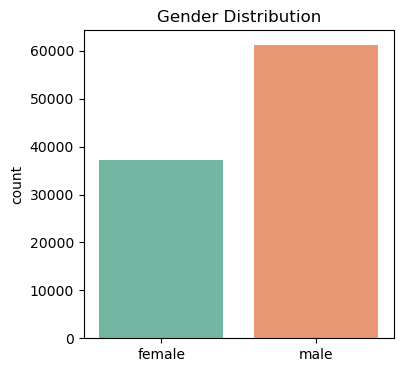

In [25]:
plt.figure(figsize=(4,4))
sns.countplot(x='gender', data=df_eda, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('')
plt.show()

Insights:  
The largest number of vehicle insurance users are men, because men tend to take more risks when driving than women, such as driving at high speeds, dangerous maneuvers, and ignoring traffic rules.

Business Insights:  
Insurance companies can offer insurance products tailored based on gender. For men, who tend to take higher risks, insurers can offer packages with broader coverage that cover certain aspects such as damage from high-speed accidents or dangerous maneuvers.

## 2. Married Distribution

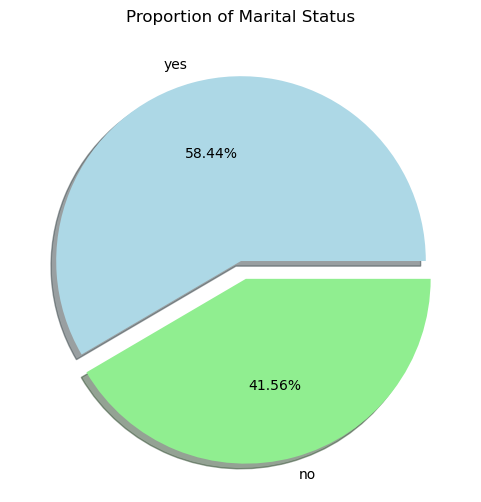

In [26]:
plt.figure(figsize=(6, 6))
df_eda['married'].value_counts().plot(kind='pie', shadow=True, explode=(0, 0.1), autopct='%.2f%%', colors=['lightblue', 'lightgreen'])
plt.title('Proportion of Marital Status')
plt.ylabel('')
plt.show()

Insights:  
Married people use more vehicle insurance than unmarried people.
Married people usually have greater responsibilities, they tend to think about security and financial protection for their partners and children, so vehicle insurance is one way to reduce financial risks that may arise from accidents.

Business Insights:  
Differentiated Product Offerings: Create vehicle insurance packages designed specifically for families, which include additional coverage relevant to their needs. Examples include protection against loss of income due to accidents, or additional family health insurance.

## 3. Education Distribution

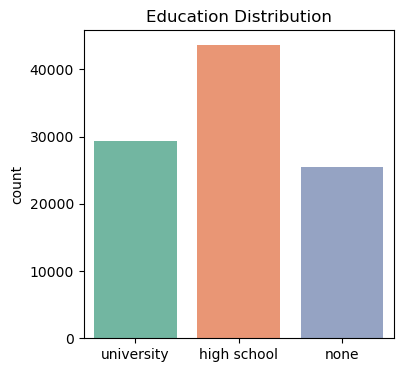

In [27]:
plt.figure(figsize=(4,4))
sns.countplot(x='education', data=df_eda, palette='Set2')
plt.title('Education Distribution')
plt.xlabel('')
plt.show()

Insights:
1. Insurance users with a high school education level are the largest users, followed by insurance users with a university education level.
2. Insurance users with a high school education may enter the workforce earlier than those pursuing higher education, thereby gaining the financial ability to own a vehicle more quickly.

Business Insights:  
Developing more affordable vehicle insurance products, with low premiums and flexibility in coverage, could attract this market segment. The product can be designed to meet the basic needs of young vehicle owners or those purchasing insurance for the first time, with the option to increase coverage as their financial capabilities and needs grow.

## 4. Type of Vehicle Distribution

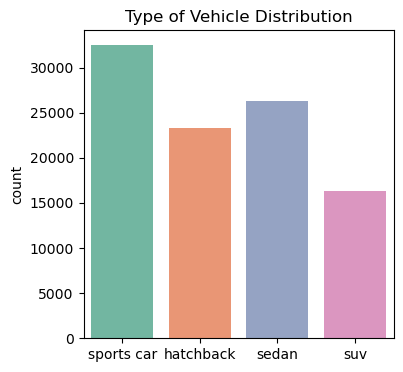

In [28]:
plt.figure(figsize=(4,4))
sns.countplot(x='type_of_vehicle', data=df_eda, palette='Set2')
plt.title('Type of Vehicle Distribution')
plt.xlabel('')
plt.show()

Insights:
1. The trend is that more vehicle insurance users own sports cars, followed by sedans, hatchbacks and finally SUVs.
2. Sports cars are often considered high risk and high value, so owners are more likely to insure them to protect their investment.
3. Meanwhile, sedans and hatchbacks have more moderate risks and values, so the number of vehicle insurance users for this type is not as many as sports cars.
4. SUVs, despite their great popularity, tend to have lower insurance premiums because they are considered safer, but high repair costs and popularity among thieves can affect the number of insurance users for this type.

Business Insihgt:  
Insurance companies can offer special products for sports cars, including more complete and special protection features, which are attractive to sports car owners.

## 5. Outcome Distribution

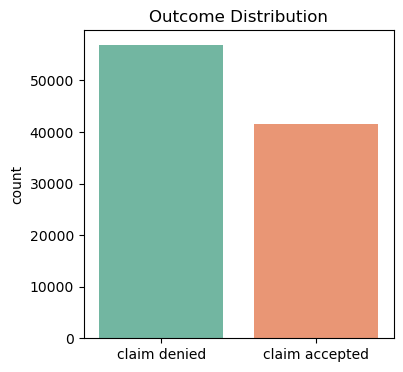

In [29]:
plt.figure(figsize=(4,4))
sns.countplot(x='outcome', data=df_eda, palette='Set2')
plt.title('Outcome Distribution')
plt.xlabel('')
plt.show()

Insights:  
In data on vehicle insurance users, claims that are rejected are greater than claims that are accepted, which means:  
1. Many claims are rejected because they do not meet the conditions stated in the insurance policy.
2. Some claims may be rejected because the vehicle damage is minor and the repair costs are below the minimum claim limit set by insurance.
3. Claims may also be rejected if there are indications of fraud or violation of insurance policy.

Business Insights:  
1. Insurance companies can improve their claims procedures by ensuring that insurance policy terms are easy for customers to understand and properly adhere to.
2. Insurance companies can carry out better risk segmentation to identify and assess potential risks that may arise in claims.
3. In preventing fraud, insurance companies can carry out in-depth analysis of suspected claims which can help detect indications of fraud or violations of insurance policies.

## 6. Vehicle Year Distribution

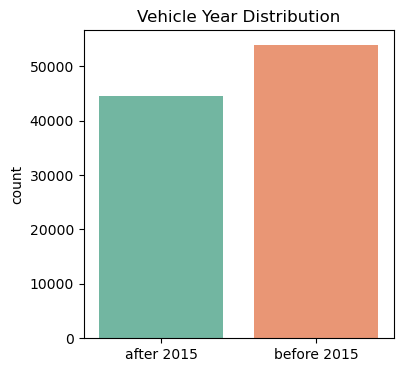

In [30]:
plt.figure(figsize=(4,4))
sns.countplot(x='vehicle_year', data=df_eda, palette='Set2')
plt.title('Vehicle Year Distribution')
plt.xlabel('')
plt.show()

Insights:  
The difference in the number of vehicles insured based on year of manufacture (before vs. after 2015) could be caused by the cost of insurance premiums. Insurance premiums can be higher for new vehicles compared to older vehicles because the replacement value is higher and repairs may be more expensive. This can make new vehicle owners prefer not to insure their vehicles

Business Insights:  
1. Flexible Premium Plans: Offer customizable premium plans, taking into account vehicle safety and technology features, to make premiums more competitive for new vehicle owners.
2. Strategic Partnerships: Collaborate with dealers and vehicle manufacturers to offer insurance as part of the purchase package, with more affordable premiums.

## 7. The Relationship Between Gender and Outcome

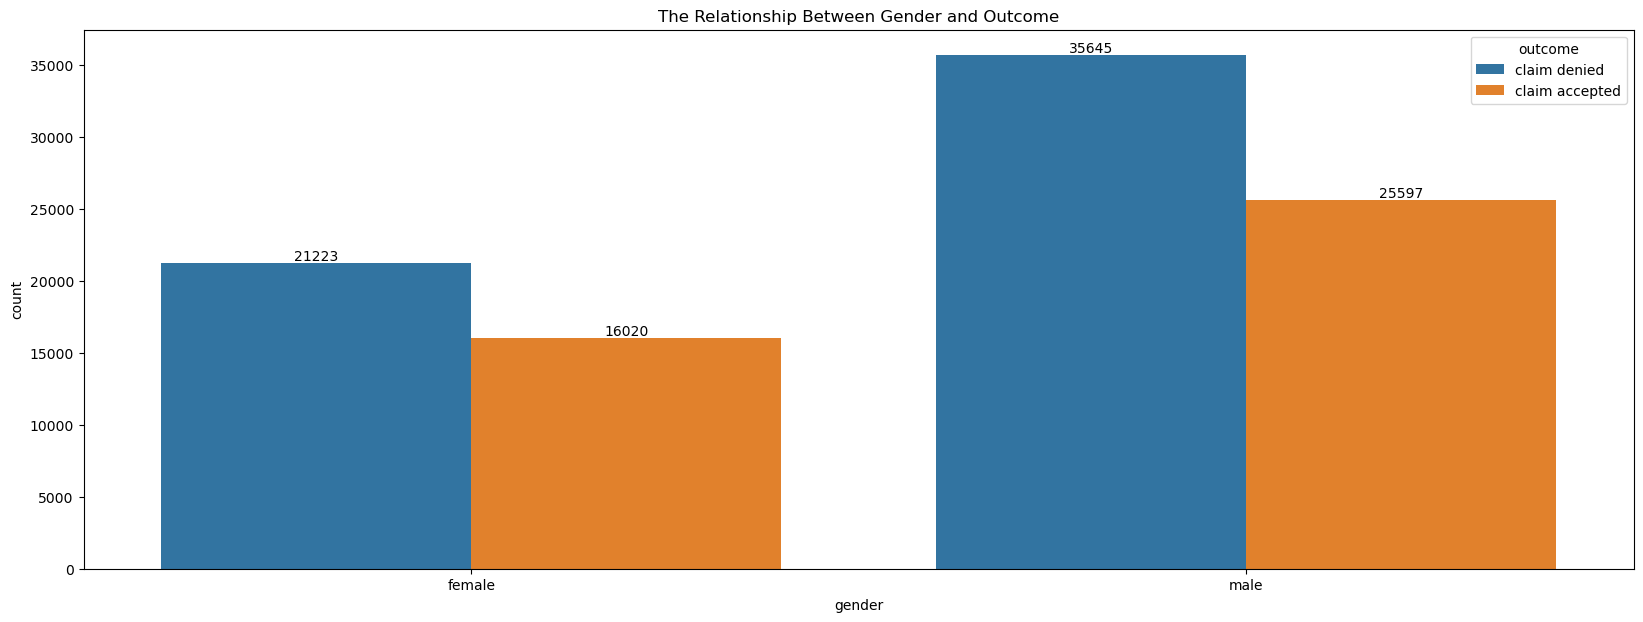

In [31]:
fig = plt.subplots(figsize=(20,7))
ax = sns.countplot(x='gender', hue='outcome', data=df_eda, linewidth=2.5)
plt.title('The Relationship Between Gender and Outcome')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

Insights:  
1. The largest number of vehicle insurance users are men, because men tend to take more risks when driving than women, such as driving at high speed, dangerous maneuvers, and ignoring traffic rules.
2. In terms of differences in the ratio of denied and accepted claims between men and women in vehicle insurance, perhaps women submit different claims than men, both in terms of frequency and type. For example, if women tend to file claims for smaller damages or incidents that do not involve accidents, those claims may be easier to process and accept.

Business Insights:  
Given the differences in driving behavior and types of claims between men and women, companies could develop insurance products that are more tailored to the specific needs of each gender, or even consider products that target safer driving behavior, without gender discrimination

Example:  
Insurance Policy with Reward Points for Safe Driving Behavior  
- Concept: Drivers earn reward points for each period without claims or traffic violations, which can be exchanged for premium discounts or other benefits.
- Benefits: Encourages drivers of both genders to adopt safer driving behavior, with direct rewards that can reduce their insurance costs.

## 8. The Relationship Between Driving Experience and Outcome

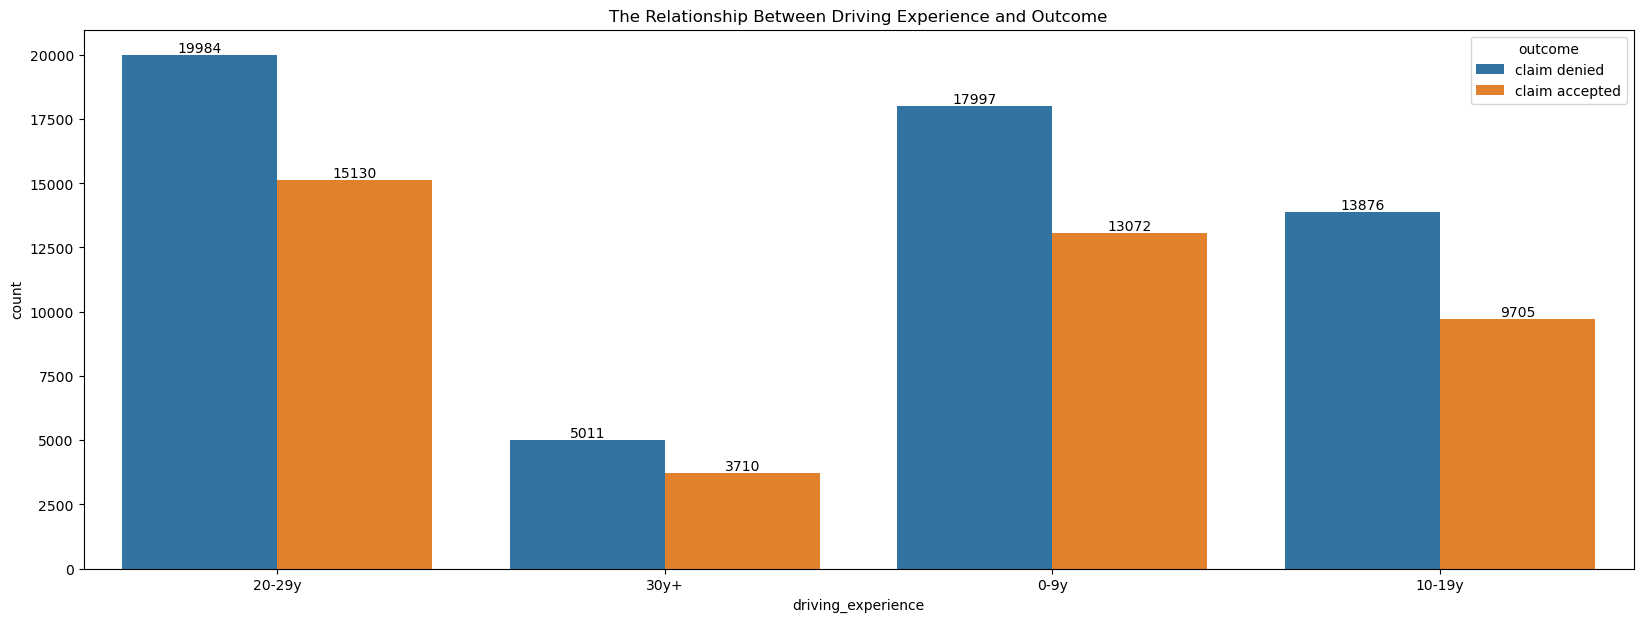

In [32]:
fig = plt.subplots(figsize=(20,7))
ax = sns.countplot(x='driving_experience', hue='outcome', data=df_eda, linewidth=2.5)
plt.title('The Relationship Between Driving Experience and Outcome')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

Insights:  
Differences in the difference between denied and accepted claims between drivers with different levels of experience can be influenced by several factors related to claims risk and propensity.
1. Better Driving Experience, drivers with more than 30 years of experience may have better driving skills and have developed safer habits over the years.
2. Safer Driving Behavior: Drivers with more experience may be more aware of compliance with traffic rules and driving safety principles.

Business Insights:
1. Insurance companies can develop education and training programs for drivers with less experience, especially those who are in the younger age range or have just obtained a driving license. This program can provide information about safe driving practices, traffic rules, and effective driving techniques to help reduce the risk of accidents and claims.
2. Insurance companies can use advanced technology, such as vehicle sensors and telematics monitoring, to collect real-time data on customers' driving behavior. By leveraging this data, companies can identify high-risk driving behavior patterns and provide feedback to customers to help them improve their driving habits.

## 9. The Relationship Between Type of Vehicle and Outcome

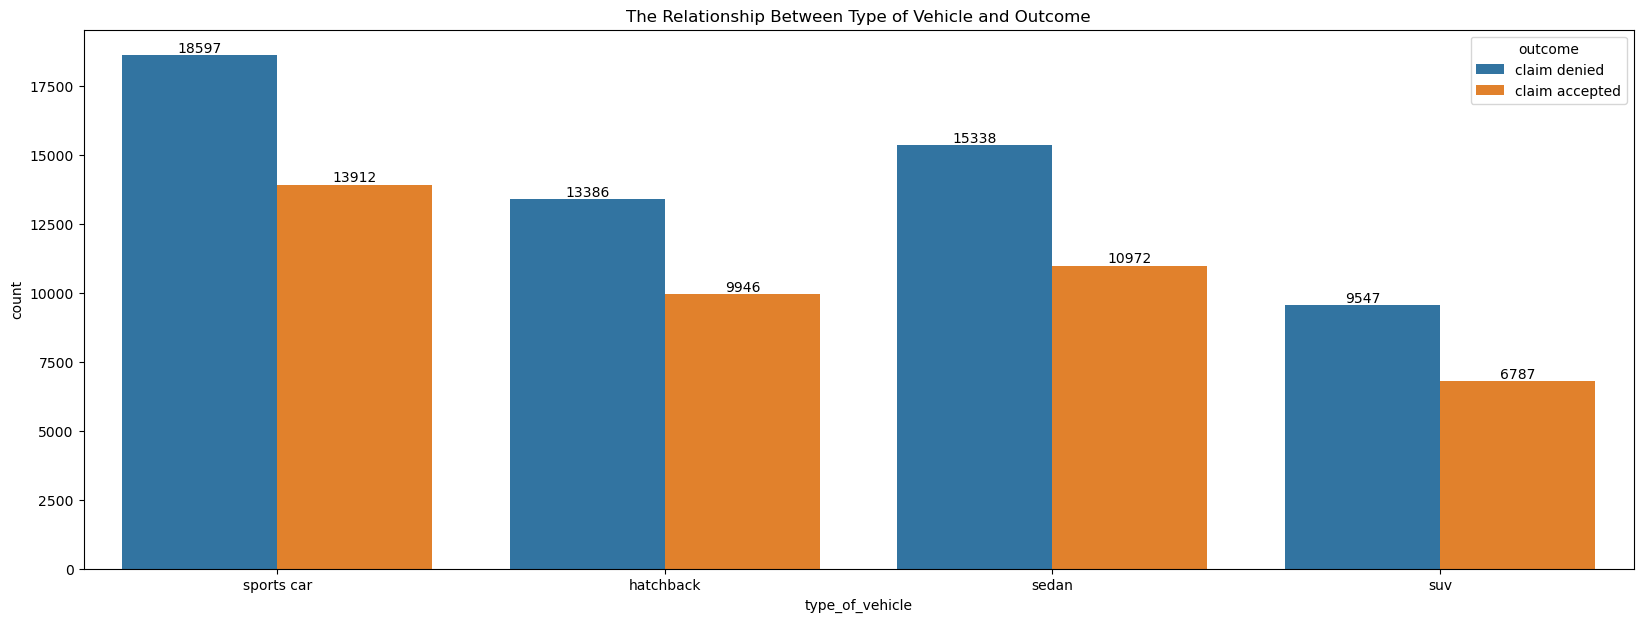

In [33]:
fig = plt.subplots(figsize=(20,7))
ax = sns.countplot(x='type_of_vehicle', hue='outcome', data=df_eda, linewidth=2.5)
plt.title('The Relationship Between Type of Vehicle and Outcome')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

Insights:  
Sports cars tend to have a higher price and value than hatchbacks, sedans, or SUVs. This may make insurance companies more careful in handling claims for sports cars due to the higher financial risks associated with these vehicles.

Business Insights:  
Based on the higher risks associated with sports cars, insurance companies may consider developing insurance products specifically for these vehicles. These products may include additional coverage or higher premiums to compensate for the higher risk.

# **E. Conclusion**

**Insight :**

1. **Vehicle Insurance User Profile**:
   - the majority of vehicle insurance users are men, who tend to take greater risks when driving.
   - There are more married vehicle insurance users, because they tend to care more about security and financial protection for their families.

2. **Education Level and Vehicle Access**:
   - Vehicle insurance users mostly have a high school education, perhaps because they enter the workforce more quickly and gain the financial ability to own a vehicle.

3. **Most Insured Vehicle Types**:
   - Sports cars are the most frequently insured vehicle type, followed by sedans, hatchbacks and SUVs.
   - This could be due to the risk and high value of sports cars, while SUVs are considered safer but have high repair costs.

4. **Ratio of Rejected and Accepted Claims**:
   - Rejected claims are greater than those accepted, indicating significant claim rejections for various reasons, including non-compliance with insurance policy terms and claims that do not reach the minimum claim limit.
   
5. **Effect of Vehicle Manufacture Year on Insurance**:
   - There are differences in the number of vehicles insured based on year of manufacture, with new vehicles (after 2015) may be underinsured due to higher premium costs.

6. **Difference in Difference between Claims Rejected and Accepted Based on Driving Experience**:
   - Better driving experience and safer driving behavior can influence the difference in the difference between rejected and accepted claims between drivers with different levels of experience.

7. **Risk Level of Sports Cars in Insurance Claims**:
   - Sports cars pose a higher financial risk for insurance companies due to their high price and value, so insurance companies are more careful in handling claims for these vehicles.

**Here are some business insights for vehicle insurance companies:**

1. **Better Market Segmentation**: By knowing that the majority of auto insurance users are men, companies can strengthen their market segmentation and adjust marketing strategies to target more male customers. This could include more focused advertising campaigns and product offerings that better suit the preferences and needs of male drivers.

2. **More Relevant Product Development**: Data shows that married people use more vehicle insurance. This could be an opportunity for companies to develop vehicle insurance products that are more tailored to family needs, such as insurance packages that include coverage for different family members.

3. **Education and Vehicle Access**: Companies can use information about customers' education levels to adjust marketing strategies and sales approaches. For example, they can provide information about the benefits of auto insurance to those who have a lower level of education and may be less skilled at understanding the complexities of insurance policies.

4. **Enhanced Services for Sports Car Users**: By recognizing the higher financial risks associated with sports cars, companies can improve their services for sports car owners, including faster and more efficient claims handling and more competitive premium offers.

5. **Improved Claims Prevention and Oversight**: By recognizing that more rejected claims are accepted, companies can improve their claims monitoring and assessment processes to ensure that submitted claims are eligible and related to legitimate losses.

6. **Further Analysis of Purchasing Trends**: Data on differences in the number of vehicles insured by year of manufacture can provide insight into customer preferences and purchasing habits. Companies can use this information to develop product strategies and promotional offers that better align with market trends.

By leveraging these insights, auto insurance companies can improve their operational effectiveness, expand market share, increase customer satisfaction, and reduce financial risks associated with insurance claims.